In [1]:
import os
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.cm as cm
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import graphviz

In [2]:
df_original = pd.read_excel("WonderfulWinesoftheWorld.xlsx")

In [3]:
df = df_original.copy()

In [4]:
df.shape

(10001, 30)

In [5]:
df.head()

Custid  Dayswus   Age   Edu    Income  Kidhome  Teenhome  Freq  Recency  \
0  5325.0    653.0  55.0  20.0   78473.0      0.0       0.0  20.0     18.0   
1  3956.0   1041.0  75.0  18.0  105087.0      0.0       0.0  36.0     33.0   
2  3681.0    666.0  18.0  12.0   27984.0      1.0       0.0   4.0     56.0   
3  2829.0   1049.0  42.0  16.0   61748.0      1.0       1.0   2.0     46.0   
4  8788.0    837.0  47.0  16.0   65789.0      0.0       1.0   2.0      3.0   

   Monetary  ...  SMRack  LGRack  Humid  Spcork  Bucket  Access  Complain  \
0     826.0  ...       0       0      0       0       0       0         0   
1    1852.0  ...       0       0      0       1       0       0         0   
2      39.0  ...       0       0      0       0       0       0         0   
3      37.0  ...       0       0      0       0       0       0         0   
4      36.0  ...       0       0      0       0       0       0         0   

   Mailfriend  Emailfriend      Rand  
0           0            0  0.240092  
1           0            0  0.435944  
2           0            0  0.350584  
3           1            1  0.594082  
4           0            0  0.782248  

[5 rows x 30 columns]

In [6]:
#prof = ProfileReport(df)

In [7]:
#prof

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum().sum()

2

In [10]:
df.head().sort_index()

Custid  Dayswus   Age   Edu    Income  Kidhome  Teenhome  Freq  Recency  \
0  5325.0    653.0  55.0  20.0   78473.0      0.0       0.0  20.0     18.0   
1  3956.0   1041.0  75.0  18.0  105087.0      0.0       0.0  36.0     33.0   
2  3681.0    666.0  18.0  12.0   27984.0      1.0       0.0   4.0     56.0   
3  2829.0   1049.0  42.0  16.0   61748.0      1.0       1.0   2.0     46.0   
4  8788.0    837.0  47.0  16.0   65789.0      0.0       1.0   2.0      3.0   

   Monetary  ...  SMRack  LGRack  Humid  Spcork  Bucket  Access  Complain  \
0     826.0  ...       0       0      0       0       0       0         0   
1    1852.0  ...       0       0      0       1       0       0         0   
2      39.0  ...       0       0      0       0       0       0         0   
3      37.0  ...       0       0      0       0       0       0         0   
4      36.0  ...       0       0      0       0       0       0         0   

   Mailfriend  Emailfriend      Rand  
0           0            0  0.240092  
1           0            0  0.435944  
2           0            0  0.350584  
3           1            1  0.594082  
4           0            0  0.782248  

[5 rows x 30 columns]

In [11]:
df.columns

Index(['Custid', 'Dayswus', 'Age', 'Edu', 'Income', 'Kidhome', 'Teenhome',
       'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred',
       'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit',
       'SMRack', 'LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain',
       'Mailfriend', 'Emailfriend', 'Rand'],
      dtype='object')

## Initial Data Visualization

NumExpr defaulting to 8 threads.
Executing constrainedlayout
LayoutBox: gridspec000000.ss000001.ax000002, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) ital

findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Fo

findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Stam' (STAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee' (LEELAWAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockw

findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gisha' (gishabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Miriam' (mriam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 n

findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Hadassah Friedlaender' (HADASAH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font

findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'David' (davidbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 norma

findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal

findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVMED.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ravie' (RAVIE.TTF) n

findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Javanese Text' (jav

findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000000.ss000003.ax000004, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000000.ss000005.ax000006, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.004659
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000000.ss000007.

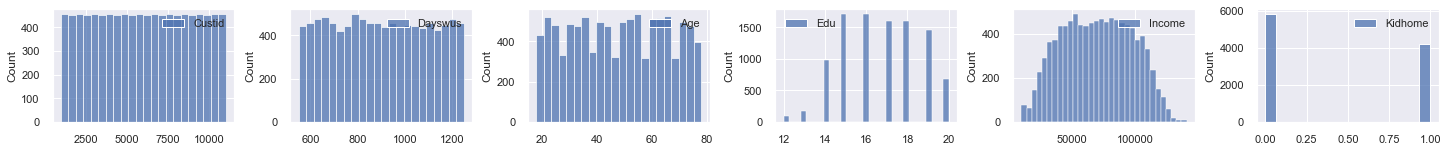

Executing constrainedlayout
LayoutBox: gridspec000013.ss000014.ax000015, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002390
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000016.ax000017, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000018.ax000019, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000020.ax000021, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003840
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000022.ax000023, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000024.ax000025, (left: 0.000) (bot: 0.000) (righ

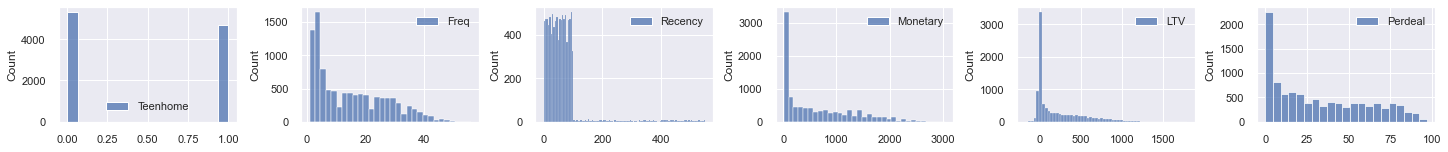

Executing constrainedlayout
LayoutBox: gridspec000026.ss000027.ax000028, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.004458
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000029.ax000030, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000031.ax000032, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002683
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000033.ax000034, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000035.ax000036, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000037.ax000038, (left: 0.000) (bot: 0.000) (righ

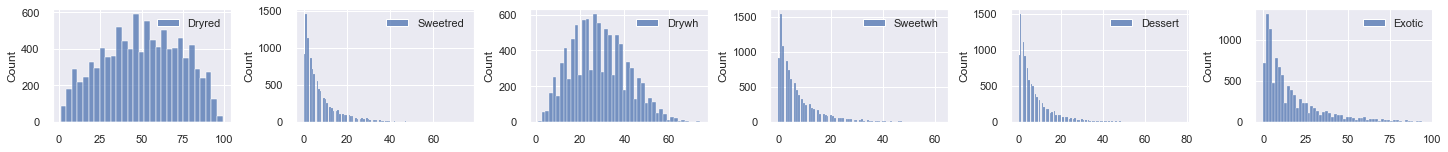

Executing constrainedlayout
LayoutBox: gridspec000039.ss000040.ax000041, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000042.ax000043, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000044.ax000045, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000046.ax000047, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000048.ax000049, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000050.ax000051, (left: 0.000) (bot: 0.000) (righ

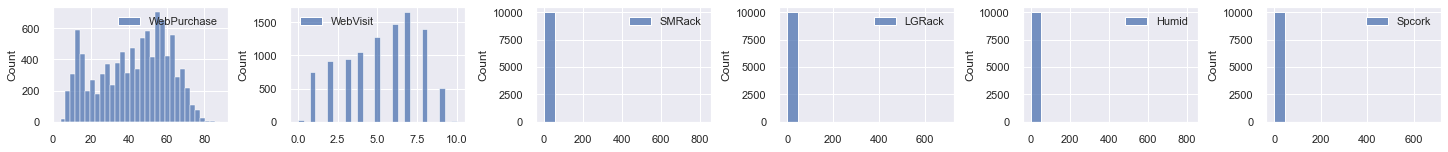

Executing constrainedlayout
LayoutBox: gridspec000052.ss000053.ax000054, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000055.ax000056, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000057.ax000058, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000059.ax000060, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.003681
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000061.ax000062, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000063.ax000064, (left: 0.000) (bot: 0.000) (righ

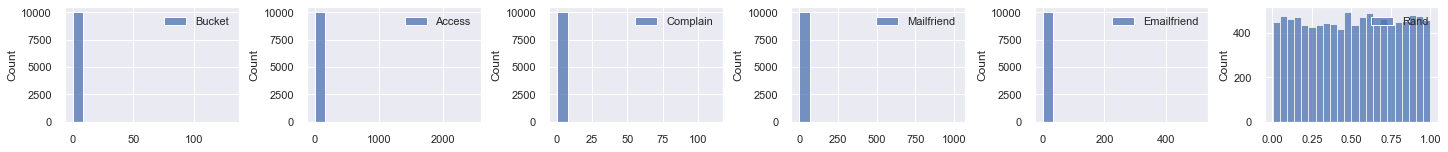

In [12]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
for i in range(5):
    fig, axes = plt.subplots(1,6, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

Executing constrainedlayout
LayoutBox: gridspec000065.ss000066.ax000067, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.032379
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000068.ax000069, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.028125
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000070.ax000071, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000072.ax000073, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000074.ax000075, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.036632
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000076.ax000077, (left: 0.000) (bot: 0.000) (right: 0.

left 0.028113
right 0.002071
bottom 0.090146
bbox.y0 0.010417
pos.y0 0.090441
LayoutBox: gridspec000065.ss000086.ax000087, (left: 0.675) (bot: 0.000) (right: 0.744) (top: 1.000)
left 0.028287
right 0.002071
bottom 0.089984
bbox.y0 0.010580
pos.y0 0.090441
LayoutBox: gridspec000065.ss000088.ax000089, (left: 0.745) (bot: 0.000) (right: 0.810) (top: 1.000)
left 0.023860
right 0.002071
bottom 0.089984
bbox.y0 0.010580
pos.y0 0.090441
LayoutBox: gridspec000065.ss000090.ax000091, (left: 0.811) (bot: 0.000) (right: 0.876) (top: 1.000)
left 0.023860
right 0.002071
bottom 0.089984
bbox.y0 0.010580
pos.y0 0.090441
LayoutBox: gridspec000065.ss000092.ax000093, (left: 0.877) (bot: 0.000) (right: 0.938) (top: 1.000)
left 0.019606
right 0.002071
bottom 0.089984
bbox.y0 0.010580
pos.y0 0.090441
LayoutBox: gridspec000065.ss000094.ax000095, (left: 0.939) (bot: 0.000) (right: 1.000) (top: 1.000)
left 0.019606
right 0.002071
bottom 0.089984
bbox.y0 0.010580
pos.y0 0.090441
LayoutBox: gridspec000065.ss0000

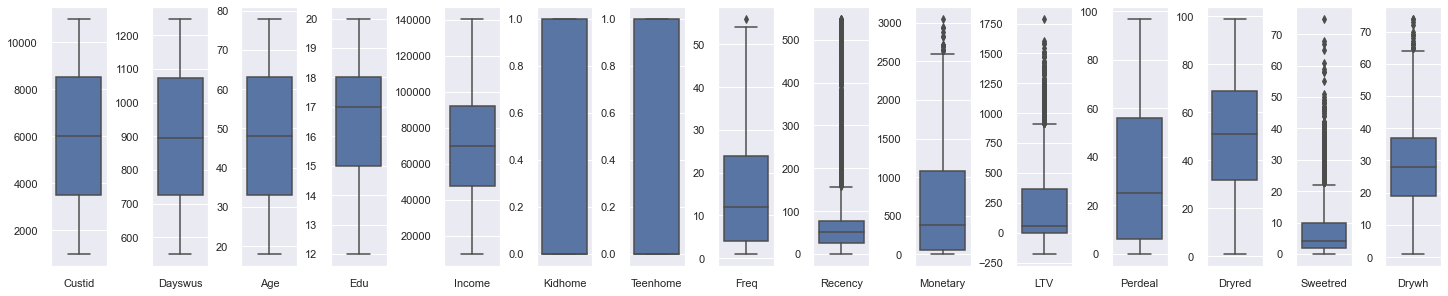

Executing constrainedlayout
LayoutBox: gridspec000096.ss000097.ax000098, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000099.ax000100, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000101.ax000102, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000103.ax000104, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.004272
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000105.ax000106, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000107.ax000108, (left: 0.000) (bot: 0.000) (right: 0.

left 0.023860
right 0.002071
bottom 0.089983
bbox.y0 0.010418
pos.y0 0.090279
LayoutBox: gridspec000096.ss000117.ax000118, (left: 0.659) (bot: 0.000) (right: 0.729) (top: 0.993)
left 0.028113
right 0.002071
bottom 0.089983
bbox.y0 0.010418
pos.y0 0.090279
LayoutBox: gridspec000096.ss000119.ax000120, (left: 0.730) (bot: 0.000) (right: 0.796) (top: 0.993)
left 0.023860
right 0.002071
bottom 0.089983
bbox.y0 0.010418
pos.y0 0.090279
LayoutBox: gridspec000096.ss000121.ax000122, (left: 0.798) (bot: 0.000) (right: 0.868) (top: 0.993)
left 0.028113
right 0.002071
bottom 0.089983
bbox.y0 0.010418
pos.y0 0.090279
LayoutBox: gridspec000096.ss000123.ax000124, (left: 0.869) (bot: 0.000) (right: 0.935) (top: 0.993)
left 0.023860
right 0.002071
bottom 0.089983
bbox.y0 0.010418
pos.y0 0.090279
LayoutBox: gridspec000096.ss000125.ax000126, (left: 0.936) (bot: 0.000) (right: 1.000) (top: 0.993)
left 0.021776
right 0.002071
bottom 0.089983
bbox.y0 0.010418
pos.y0 0.090279
LayoutBox: gridspec000096.ss0000

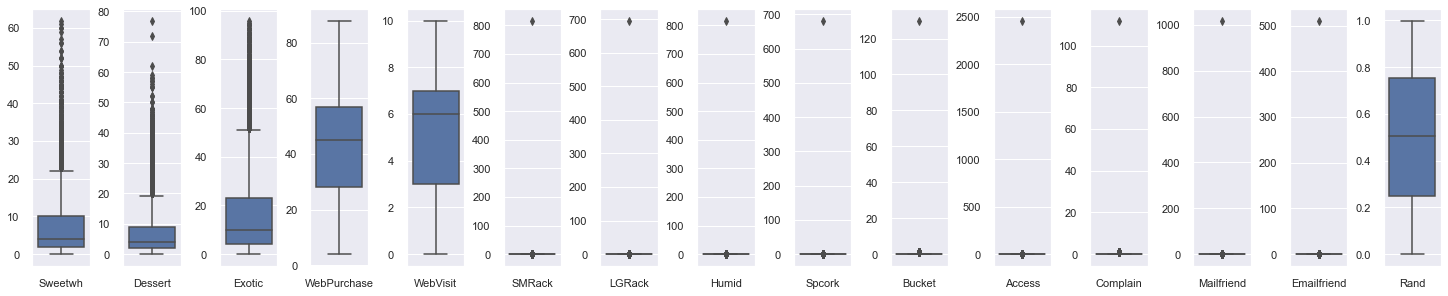

In [13]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1


for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E2D56CC820>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E2D56CC820> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


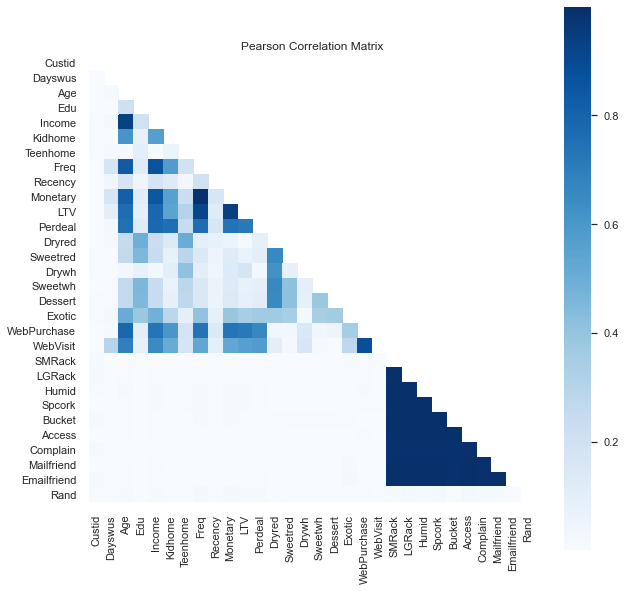

In [14]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()
    
heatmap_pearson(df.corr(method='pearson').abs())

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E2D3CBEEE0>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E2D3CBEEE0> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


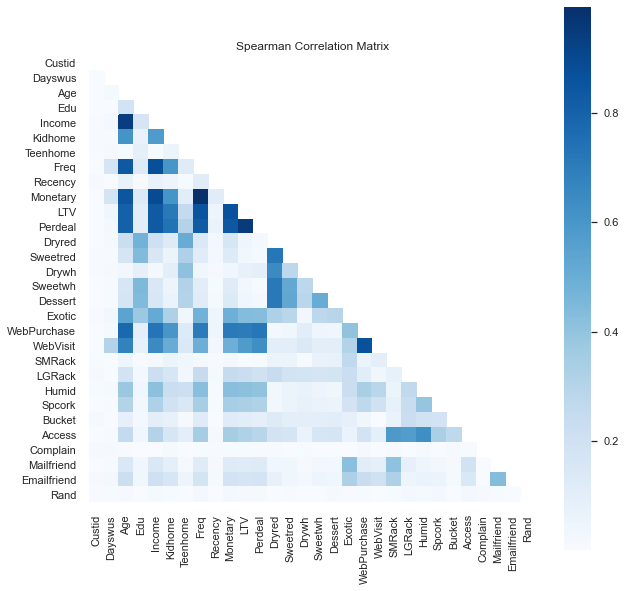

In [15]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()
    
heatmap_spearman(df.corr(method='spearman').abs())

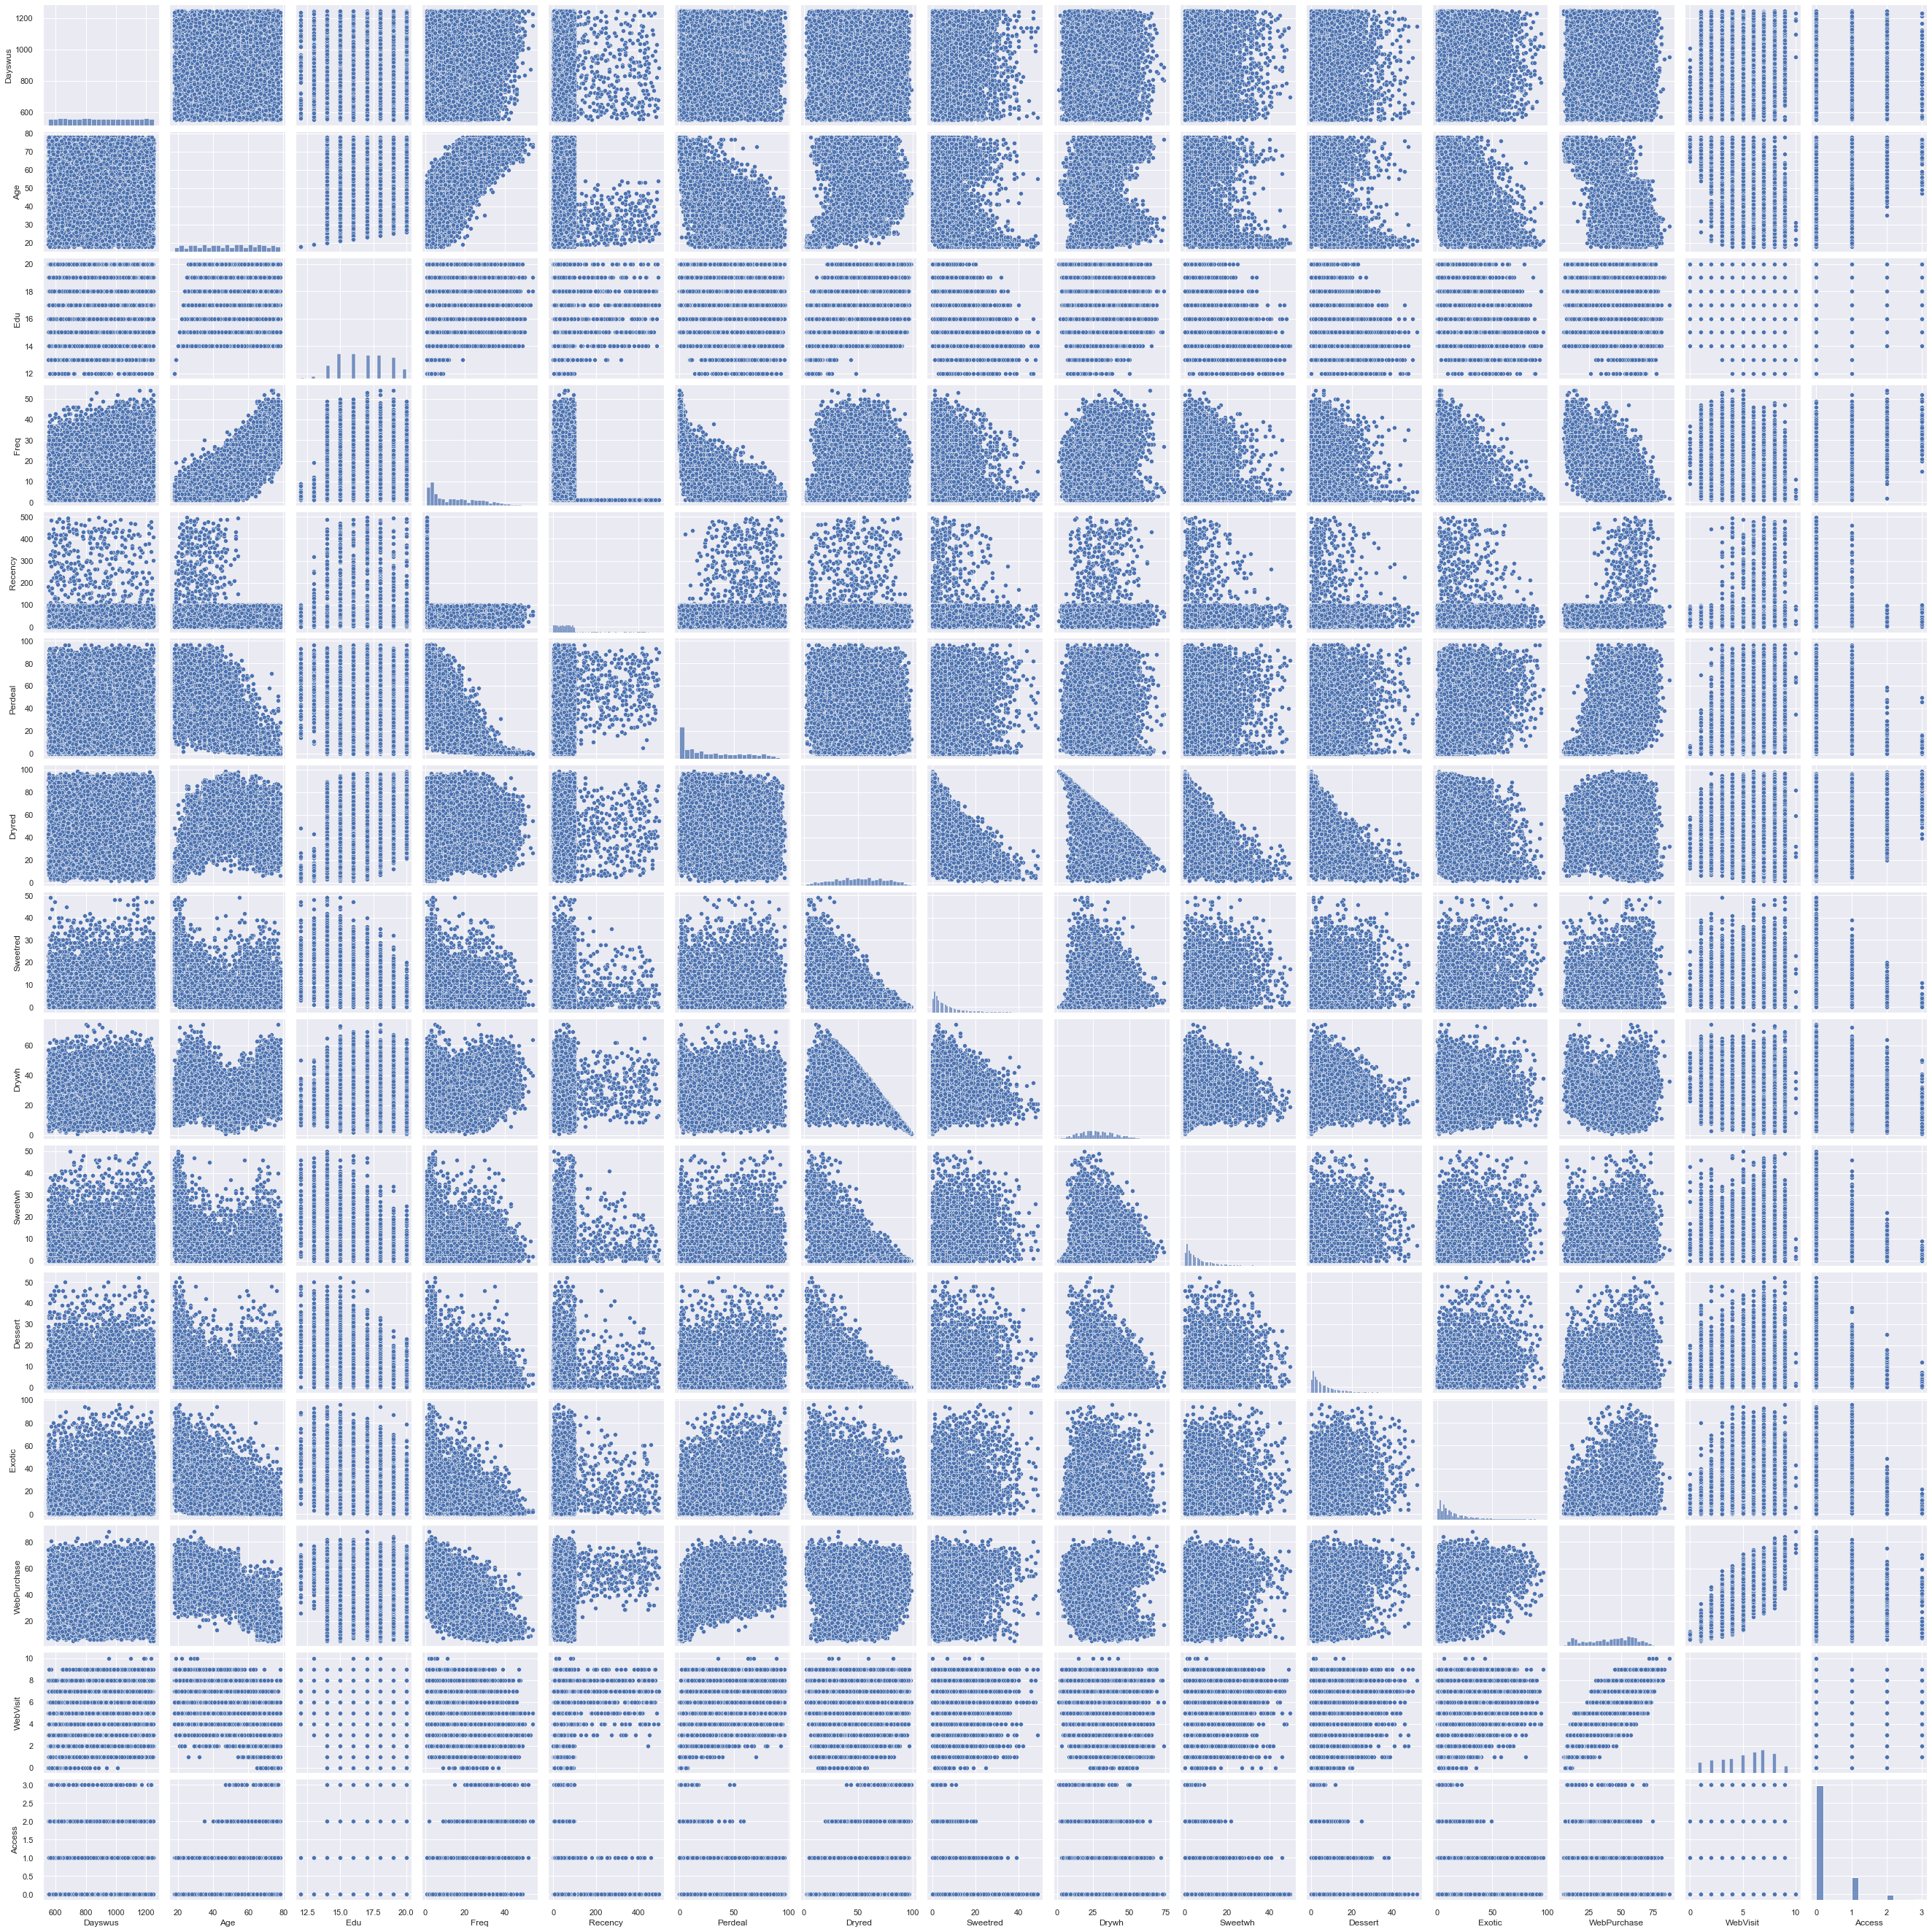

In [114]:
# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

In [16]:
#fazer as outras correlacoes

As we can see there are some errors/outliers that are needed to be handled. Therefore they must be removed from the dataset.

The outliers quickly identified are in the SMRack, LGRack, Humid, Spcork, Bucket, Access, Complain, Mailfriend and Emailfriend, since the values in these columns are percentages and there are values above 100%.

The column Custid will be the new index of the dataframe.

The column Rand will be dropped since it only returns a random number between 0 and 1.

In [17]:
#fazer histogramas, remover erros, outliers(dbscan, lof)

In [18]:
df = df_original.copy()

In [19]:
df.shape

(10001, 30)

In [20]:
df.drop(["Rand"],axis=1,inplace=True)

In [21]:
df.set_index('Custid',inplace=True)

In [22]:
df.sort_index(inplace=True)

In [23]:
df.replace(" ", np.nan, inplace=True)

In [24]:
filters = (
    (df["SMRack"]>100) | (df["LGRack"]>100) | (df["Humid"]>100) | (df["Spcork"]>100) |
    (df["Bucket"]>100) | (df["Access"]>100) | (df["Complain"]>100) | (df["Mailfriend"]>100) | (df["Emailfriend"]>100)
          )
df1=df[filters]

In [25]:
to_remove = list(df1.index)

In [26]:
df = df.drop(to_remove)

In [27]:
df.shape

(10000, 28)

There aren't any more na values.

In [28]:
df.isna().sum().sum()

0

In [29]:
data_corr = df.corr()
corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.9] 
corrdata = corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
corrdata.Features2.unique()

array(['Monetary', 'Freq', 'LTV', 'Age', 'Income'], dtype=object)

In [30]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [31]:
for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [32]:
correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [33]:
for c in correlated_group:
    print(c)

['Freq' 'Monetary' 'LTV']
['Income' 'Age']


In [34]:
df.drop(["LTV", "Monetary"], inplace=True, axis=1)

In [35]:
df.drop(["Income"], inplace=True, axis=1)

In [36]:
df.shape

(10000, 25)

Separation of non-metric features and metric features.

In [37]:
non_metric_features = ["Kidhome","Teenhome", "SMRack", "LGRack", "Humid",
                       "Spcork", "Bucket", "Complain", "Mailfriend", "Emailfriend"]

In [38]:
metric_features = df.columns.drop(non_metric_features).to_list()

## Outliers

#### Isolation Forest

In [39]:
data_central = df.copy()

In [40]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[metric_features])

In [41]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [42]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 4), 5)*100, "%")

Percentage of data removed after outliers: 1.01 %


In [43]:
#reduzir a percentagem de outliers removed

#### Minimum Covariance Determinant


In [44]:
ee = EllipticEnvelope(contamination=0.01)
ee_df = ee.fit_predict(data_central[metric_features])

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (46.360854689736456 > 21.267819745166030). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn("Determinant has increased; this should not happen: "
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (46.350193358477696 > 21.472482726718226). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn("Determinant has increased; this should not happen: "
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (46.318419749839357 > 21.96295

In [45]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [46]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.0 %


In [47]:
df.drop(outliers_if.index,inplace=True)
df.drop(outliers_mcd.index,inplace=True)

In [48]:
df.shape

(9801, 25)

### PCA visualization of Outliers

In [119]:
#from sklearn.decomposition import PCA

In [165]:
#df_pca = df_original.copy()
#df_pca.set_index('Custid',inplace=True)

In [166]:
# Use PCA to reduce dimensionality of data
#pca = PCA()
#pca_feat = pca.fit_transform(df_pca[metric_features])
#pca_feat  # What is this output?

array([[-2.44482357e+02, -5.18458466e+01, -2.52203015e+01, ...,
         2.03482127e+00, -1.08510391e+00,  1.81206488e-02],
       [ 1.43291853e+02, -3.40385850e+01, -4.84004838e+01, ...,
         2.73551298e-01, -5.78410695e-01, -4.40238131e-01],
       [-2.31844936e+02,  1.56997620e+00,  8.11076374e+01, ...,
        -9.14260179e-01, -1.29883725e+00, -7.34104745e-03],
       ...,
       [ 2.04433709e+02,  3.09446604e+02, -1.78785753e+01, ...,
         9.57145044e-02,  1.06491748e+00, -8.93077586e-03],
       [ 8.13752440e+01, -3.74429913e+01, -2.72703475e+01, ...,
        -8.60600913e-01,  1.62586671e-02,  1.49881126e-02],
       [-6.23541401e-02, -1.57109600e+00, -1.94060861e+01, ...,
         1.88210533e-01, -4.46509351e-02, -2.08940404e-03]])

In [167]:
# Output PCA table
#pd.DataFrame(
#    {"Eigenvalue": pca.explained_variance_,
#     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
 #    "Proportion": pca.explained_variance_ratio_,
  #   "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
  #  index=range(1, pca.n_components_ + 1)
#)

Eigenvalue    Difference  Proportion  Cumulative
1   41011.979324      0.000000    0.832677    0.832677
2    4941.552224 -36070.427100    0.100330    0.933006
3    1327.595494  -3613.956730    0.026955    0.959961
4     721.621305   -605.974190    0.014651    0.974612
5     605.218536   -116.402768    0.012288    0.986900
6     228.644488   -376.574048    0.004642    0.991542
7     156.121705    -72.522783    0.003170    0.994712
8     107.405537    -48.716168    0.002181    0.996893
9      50.816550    -56.588988    0.001032    0.997924
10     38.776976    -12.039573    0.000787    0.998712
11     35.826649     -2.950327    0.000727    0.999439
12     24.786376    -11.040273    0.000503    0.999942
13      2.203453    -22.582923    0.000045    0.999987
14      0.584460     -1.618994    0.000012    0.999999
15      0.052124     -0.532336    0.000001    1.000000

In [168]:
# Perform PCA again with the number of principal components you want to retain
#pca = PCA(n_components=2)
#pca_feat = pca.fit_transform(df_pca[metric_features])
#pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
#pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
#pca_df

PC0         PC1
Custid                        
5325.0 -244.482357  -51.845847
3956.0  143.291853  -34.038585
3681.0 -231.844936    1.569976
2829.0  151.271651   -9.286422
8788.0  -60.257567  -58.894944
...            ...         ...
4070.0 -301.978260  -25.618021
7909.0 -279.195247    3.598622
4158.0  204.433709  309.446604
4914.0   81.375244  -37.442991
NaN      -0.062354   -1.571096

[10001 rows x 2 columns]

In [191]:
#outliers = list(outliers_mcd.index.tolist() + outliers_if.index.tolist())
#
#def is_out(x):
#    if x in outliers:
#        return 'Outlier'
#    else:
#        return 'Not Outlier'
#
#pca_df['OUTLIER'] = pca_df.reset_index()['Custid'].apply(is_out)

In [192]:
#pca_df.describe(include='all')

PC0           PC1      OUTLIER
count   1.000100e+04  1.000100e+04         9000
unique           NaN           NaN            2
top              NaN           NaN  Not Outlier
freq             NaN           NaN         8822
mean    3.091973e-14  4.728900e-15          NaN
std     2.025141e+02  7.029618e+01          NaN
min    -3.496170e+02 -7.257866e+01          NaN
25%    -1.744437e+02 -3.632825e+01          NaN
50%    -4.420875e+00 -9.923756e+00          NaN
75%     1.765186e+02  1.579819e+01          NaN
max     3.526797e+02  4.918122e+02          NaN

In [1]:
#fig = plt.figure(figsize=(10,10))
#sns.scatterplot(data=pca_df, x="PC0", y="PC1", hue='OUTLIER')
#plt.xlabel('Dim 1 (83%)')
#plt.ylabel('Dim 2 (10%)')

## Data Visualization after some Feature Engeneering

Metric Features Histogram


Executing constrainedlayout
LayoutBox: gridspec000127.ss000128.ax000129, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000130.ax000131, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.004312
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000132.ax000133, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000134.ax000135, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000136.ax000137, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

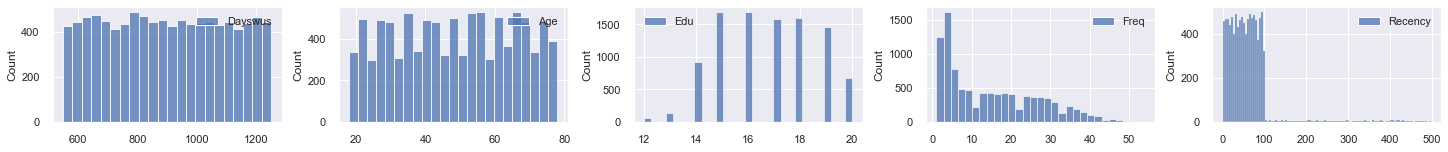

Executing constrainedlayout
LayoutBox: gridspec000138.ss000139.ax000140, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.006147
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000141.ax000142, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.003642
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000143.ax000144, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000145.ax000146, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000147.ax000148, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

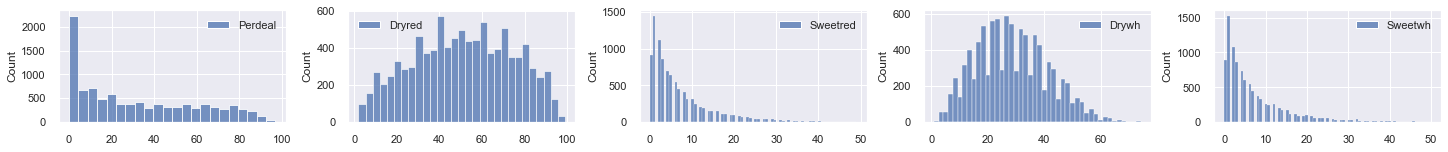

Executing constrainedlayout
LayoutBox: gridspec000149.ss000150.ax000151, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000152.ax000153, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.007451
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000154.ax000155, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000156.ax000157, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000158.ax000159, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

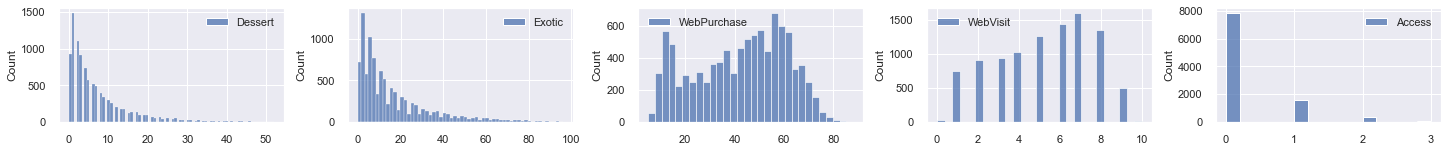

In [49]:
sns.set()

plot_features = df[metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Metric Features Histogram")
for i in range(3):
    fig, axes = plt.subplots(1,5, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

Executing constrainedlayout
LayoutBox: gridspec000160.ss000161.ax000162, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.028125
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000163.ax000164, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000165.ax000166, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000167.ax000168, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000169.ax000170, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bottoms


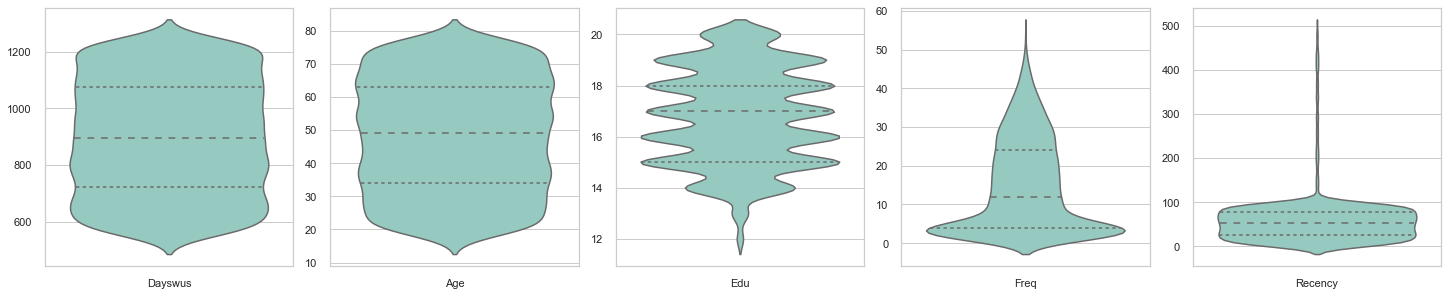

Executing constrainedlayout
LayoutBox: gridspec000171.ss000172.ax000173, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000174.ax000175, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000176.ax000177, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000178.ax000179, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000180.ax000181, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bottoms


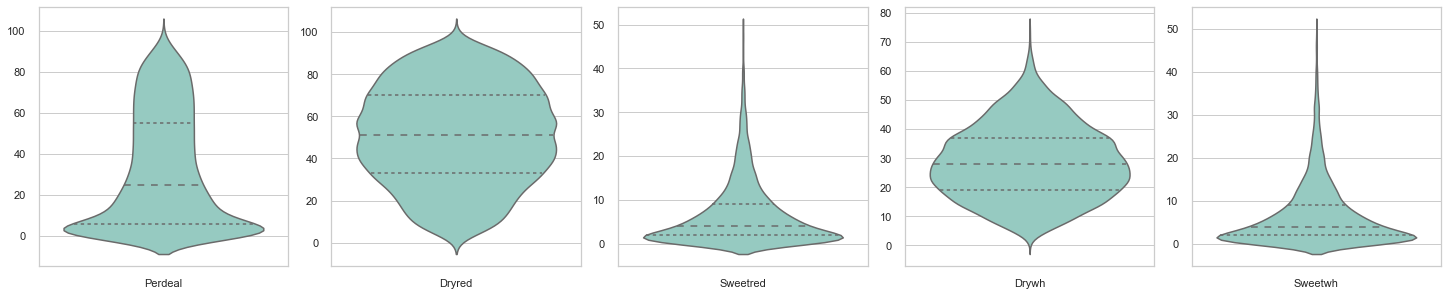

Executing constrainedlayout
LayoutBox: gridspec000182.ss000183.ax000184, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000185.ax000186, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000187.ax000188, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000189.ax000190, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000191.ax000192, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.021788
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bottoms


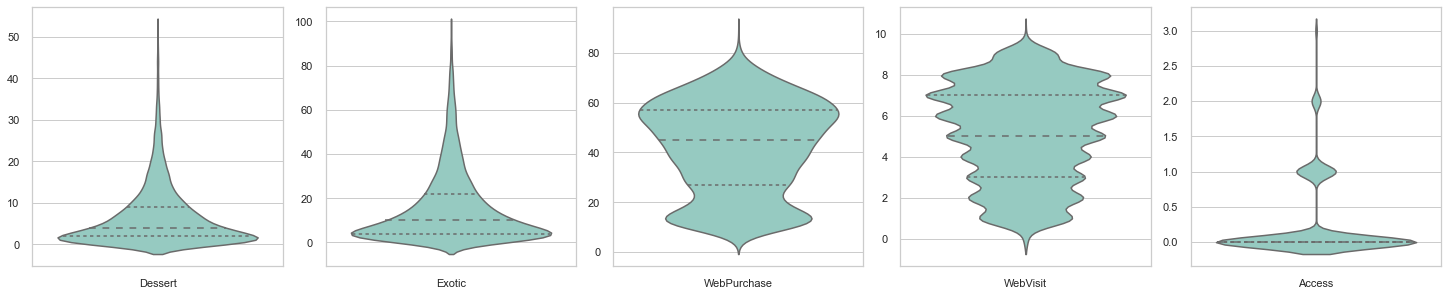

In [50]:
sns.set_theme(style="whitegrid")

j=0
k=1
for i in range(3):
    fig, axes = plt.subplots(1,5, figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.violinplot(data=df[metric_features].iloc[:,j:k], ax=i[0], palette="Set3", split=True,
                       scale="width", inner="quartile")
        j=j+1
        k=k+1

Non Metric Features Histogram


Executing constrainedlayout
LayoutBox: gridspec000193.ss000194.ax000195, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000196.ax000197, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000198.ax000199, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000200.ax000201, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000202.ax000203, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

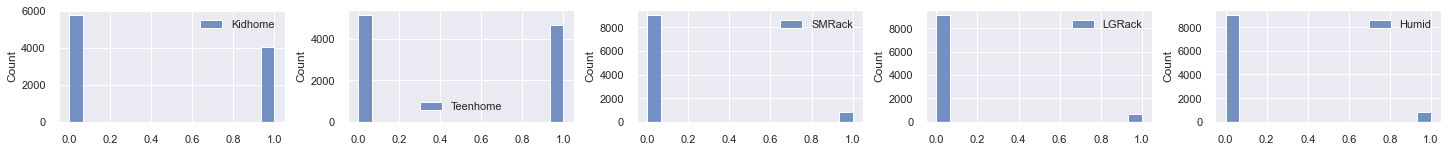

Executing constrainedlayout
LayoutBox: gridspec000204.ss000205.ax000206, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000207.ax000208, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000209.ax000210, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000211.ax000212, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000213.ax000214, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

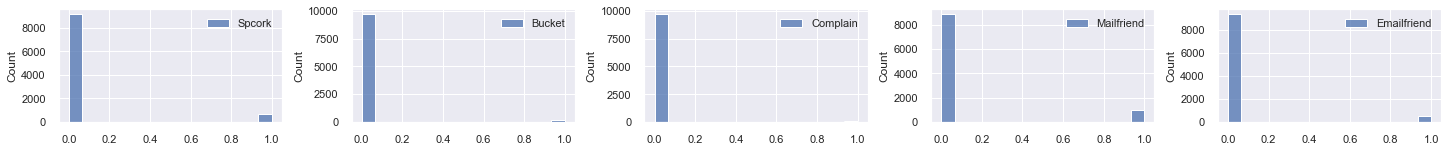

In [51]:
sns.set()

plot_features = df[non_metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Non Metric Features Histogram")
for i in range(2):
    fig, axes = plt.subplots(1,5, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[non_metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

Executing constrainedlayout
LayoutBox: gridspec000215.ss000216.ax000217, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.028125
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000218.ax000219, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000220.ax000221, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000222.ax000223, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000224.ax000225, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000226.ax000227, (left: 0.000) (bot: 0.000) (right: 0.

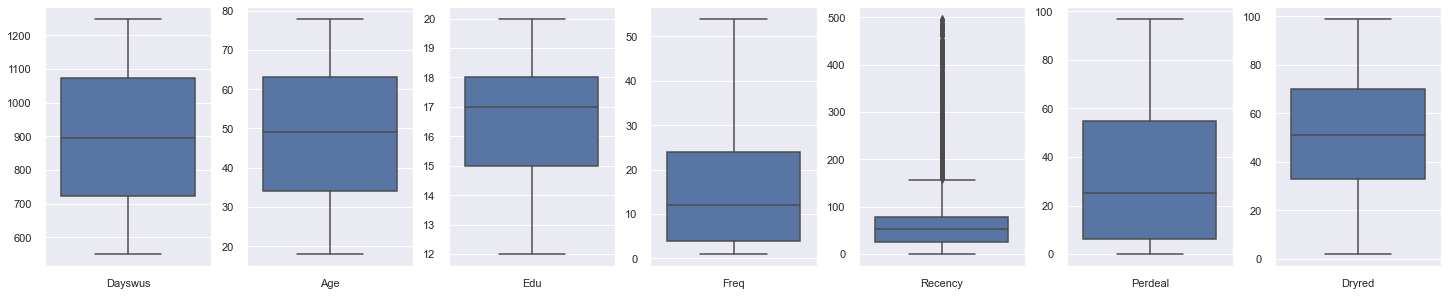

Executing constrainedlayout
LayoutBox: gridspec000230.ss000231.ax000232, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000233.ax000234, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000235.ax000236, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000237.ax000238, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000239.ax000240, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000241.ax000242, (left: 0.000) (bot: 0.000) (right: 0.

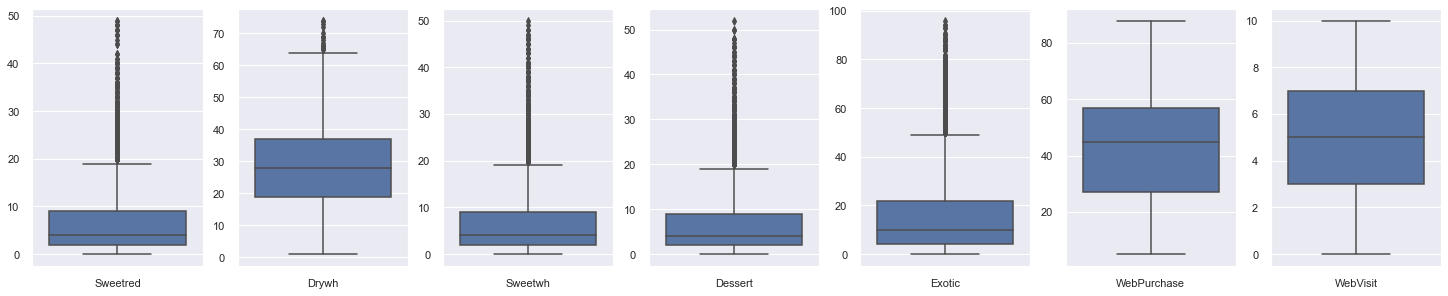

In [52]:
sns.set()

plot_features = df[metric_features].columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1


for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

In [53]:
# Pairwise Relationship of Numerical Variables
#sns.set()
#features = metric_features

# Setting pairplot
#sns.pairplot(data=df[metric_features], diag_kind="hist")

# Layout
#plt.subplots_adjust(top=0.95)
#plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

#plt.show()

<div class="alert alert-block alert-success">

## 3) Clustering
    
</div>

In [54]:
def plotKElbow(cluster,data,metric):
    visualizer = KElbowVisualizer(cluster, k=(2,12), metric=metric, timings=False,locate_elbowbool=False)
    visualizer.fit(data)        
    visualizer.show()   
    

In [55]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [56]:
def kmeans_cluster(df,n_clust):
    kmclust = KMeans(n_clusters=n_clust, init='k-means++', n_init=15, random_state=1)
    df_labels = kmclust.fit_predict(df)
    return df_labels


In [57]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        #ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [58]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [59]:
def gmm_cluster(data, nclust):
    gmm=GaussianMixture(n_components=nclust, init_params='kmeans', random_state=0)
    gmm.fit(data)
    clust_labels = gmm.predict(data)
    return(clust_labels)

In [60]:
def avg_silhouette(min_range,max_range,df,cluster):
    avg_silhouette = []
    for nclus in range(min_range,max_range):
        # Skip nclus == 1
        if nclus == 1:
            continue
    
        # Create a figure
        fig = plt.figure(figsize=(10,5 ))

        if "n_clusters" in cluster.get_params():
            param = "n_clusters"
        else:
            param = "n_components"
        
        
        # Get the cluster labels by applying a given clustering algorithm
        clustering = cluster.set_params(**{param:nclus})
        cluster_labels = clustering.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label") 

    # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(df) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))

<div class="alert alert-block alert-info">

### Standardaization
    
</div>

In [61]:
scaler = StandardScaler().fit(df)
standard_df=pd.DataFrame(scaler.transform(df),index=df.index, columns=df.columns)

<div class="alert alert-block alert-info">

### Select the best features
    
</div>

In [62]:
cluster = KMeans(random_state=0)

findfont: Matching STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (

findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (

findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Stam' (STAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee' (LEELAWAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) itali

findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gisha' (gishabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Miriam' (mriam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>

findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Hadassah Friedlaender' (HADASAH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 

findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 11.145
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 11.05
findfont: score(<Font 'David' (davidbd.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 10.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) 

findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 11.525
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal no

findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 11.24
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Kav' (GKAVME

findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgiai

findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 11.05
findfont: Matching STIXGeneral:style=italic:variant=normal:weight=normal:stretch=normal:size=12.0 to STIXGeneral ('C:\\Users\\migue\\.conda\\envs\\BCDS\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf') with score of 0.050000.
findfont: Matching STIXGeneral:style=normal:variant=normal:weight=bold:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.05
findfont: score

findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.25
findfont: score(<Font 'T

findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Levenim MT' (lvnm.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Stam' (STAM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Leelawadee' (LEELAWAD.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD

findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 10.24
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.4395
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Guttman Drogolin' (DROGM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gisha' (gishabd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothi

findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Hadassah Friedlaender' (HADASAH.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.535
findfont:

findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candara

findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF

findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Chiller

findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bradley H

findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Matura MT Script Capital

findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'FrankRuehl' (frank.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 11.145
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Berlin S

findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'David' (david.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 10.05

findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 11.525
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Yad-Brush' (GYADBR.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 11.145
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 11.1545
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 10.15
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Fo

findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Stencil

findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 0.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal norma

findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.24
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.535
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft Tai

findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Kav' (GKAVBLD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Narkisim' (nrkis.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF) normal nor

findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.145
findfont: score(<Font 'Hadassah Friedlaender' (HADASAHB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.145
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Sitka Small' 

findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rod' (rod.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal 350 normal>) = 10.3825
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 norma

findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.25
findfont: 

findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Leelawadee' (LEELAWDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic n

findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Guttman Hatzvi' (TZVIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Guttman Hatzvi' (TZVIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Vilna' (VILNAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Pe

findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Levenim MT' (lvnmbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) i

findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 

findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Outl

findfont: score(<Font 'Gisha' (gisha.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVBLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal

findfont: score(<Font 'Guttman Stam1' (STAM1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Aharoni' (ahronbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Extra Bold' (ROCKE

findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'ROG Fonts' (ROGFonts-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rod' (rod.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal 35

findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Medium' (f

findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) ita

findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Guttman Hatzvi' (TZVIB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Guttman Hatzvi' (TZVIM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Vilna' (VILNA

findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Levenim MT' (lvnmbd.tt

findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cms

findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Aharoni' (GAHROM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) no

findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gisha' (gisha.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) n

findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Miriam Fixed' (mriamc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Guttman Stam1' (STAM1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Consolas' (consolai.ttf)

findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Frnew' (FRNEW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Uighur' (MSUIGHUB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'ROG Fonts' (ROGFonts-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) nor

findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Miryam' (MIRB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Palatino Linotype' (palai.ttf) ital

findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.24
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font

findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Miryam' (MIRL.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal nor

findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Calibri' (calibrili.ttf) 

findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (S

findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700

findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gisha' (gisha.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) norma

findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Microsoft Uighur' (MSUIGHUR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Miriam Fixed' (mriamc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Guttman Stam1' (STAM1.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) nor

findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Frnew' (FRNEW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Uighur' (MSUIGHUB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic norma

findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Frank' (FRANKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 

findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.24
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'French Script 

findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal 

findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malg

findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol

findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TT

findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) nor

findfont: score(<Font 'Miriam' (mriam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Microsoft Uighur' (MSUIGHUR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Miriam Fixed' (mriamc.ttf) normal normal 400 nor

findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 

findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 

findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.24
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) 

findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVMED.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic

findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal 

findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta

findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia'

findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee' (LEELAWAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic n

findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gisha' (gishabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Miriam' (mriam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav-Light' (GKAVLIT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal

findfont: score(<Font 'Hadassah Friedlaender' (HADASAH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bri

findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'David' (davidbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Guttman Frank' (GFRANK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal

findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 n

findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVMED.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal no

findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tahoma' (ta

findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: Matching cmss10:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to cmss10 ('C:\\Users\\migue\\.conda\\envs\\BCDS\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf') with score of 0.050000.
findfont: Matching cmex10:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Drogolin' (DROGB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Micros

findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Levenim MT' (lvnm.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Stam' (STAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee' (LEELAWAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (n

findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Drogolin' (DROGM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gisha' (gishabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Miriam' (mriam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal 

findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Hadassah Friedlaender' (HADASAH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: 

findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'David' (davidbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF

findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Mantova-Decor' (MANTDEC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Mantova' (MANTM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal no

findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Rashi' (RASHI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (couri.ttf

findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Haim-Condensed' (GHAIMC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Mantova' (MANTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Cen

findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: Matching DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\migue\\.conda\\envs\\BCDS\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
findfont: Matching DejaVu Sans:style=italic:variant=n

findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 11.145
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Yad' (GYADL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'Tw Cen MT' 

findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'David' (david.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman-Aharoni' (AHROB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Levenim MT' (lvnm.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal nor

findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Guttman Yad-Brush' (GYADBR.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 11.145
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 11.1545
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 10.15
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Drogolin' (DROGM.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 11.25
findfont: score(<Font 'A

findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 11.335
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 11.335
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.t

findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.05
findfon

findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.535
findfont: score(<Font 'Guttman Rashi' (RASHIB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.25
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri

findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman Logo1' (LOGO1.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Guttman-CourMir' (MIRFX.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Guttman-Aram' (ARAM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (s

findfont: score(<Font 'Hadassah Friedlaender' (HADASAHB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.145
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.145
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.145
findfont: score(<Font 'Ca

findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Gigi' (GIGI.TTF) normal 

findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'FrankRuehl' (frank.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Vilna' (VILNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Freestyle Scrip

findfont: score(<Font 'Leelawadee' (LEELAWDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'David' (david.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>)

findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Yad-Brush' (GYADBR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 10.145
findfont: score(<

findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.tt

findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) 

findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Guttman Myamfix' (GMYAMFIX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'OCR A Extended

findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Kav' (GKAVBLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Narkisim' (nrkis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal nor

findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Aharoni' (ahronbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Guttman Yad-Light' (GYADXL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
findfont: score(<Font 'Hadassah Friedlaender' (HADASAHB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'SimSun' (simsun.ttc) no

findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rod' (rod.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Guttman Haim' (GHAIM.TTF) normal normal 400 normal>)

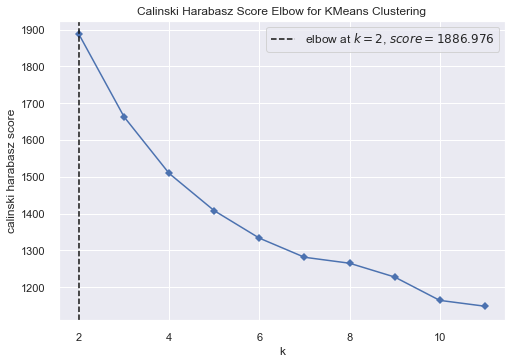

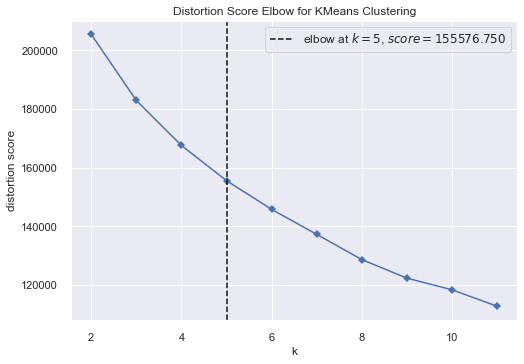

In [63]:
plotKElbow(cluster,standard_df,'calinski_harabasz')
plotKElbow(cluster,standard_df,'distortion')

In [64]:
standard_df['labels']=kmeans_cluster(standard_df,4)

In [65]:
# Preparing the data
X = standard_df.drop(columns='labels')
y = standard_df.labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(rf.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 95.51% of the customers correctly


In [66]:
importances = rf.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

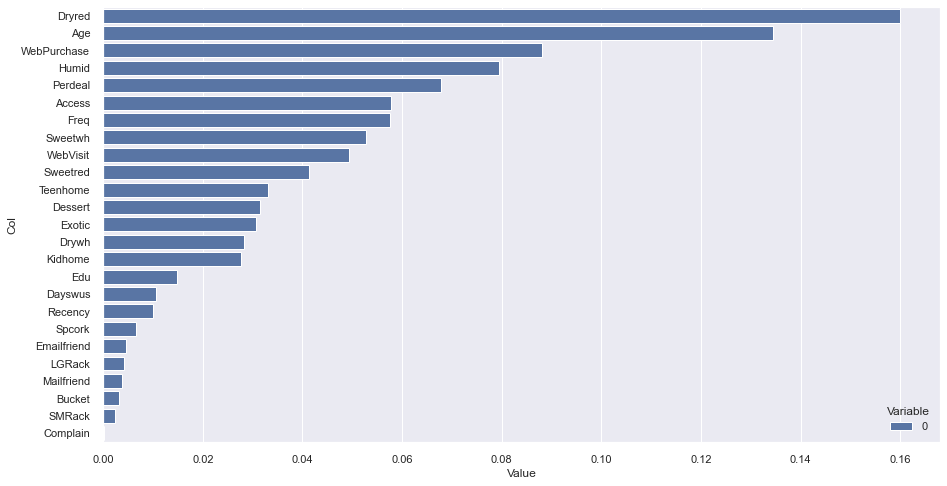

In [67]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [68]:
selected_df=standard_df.loc[:,["Age","Dryred","Perdeal","Humid","Sweetred","WebPurchase","Teenhome"]]

<div class="alert alert-block alert-info">

### Self-Organizing Maps (SOM) + K-means
    
</div>

Considering the good results of the previous segmentation we decided to experiment with the SOM + K-means approach.

In [69]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    selected_df.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=selected_df.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.059000, quantization error: 1.824643

 epoch: 2 ---> elapsed time:  0.049000, quantization error: 2.449892

 epoch: 3 ---> elapsed time:  0.051000, quantization error: 2.374972

 epoch: 4 ---> elapsed time:  0.052000, quantization error: 2.327600

 epoch: 5 ---> elapsed time:  0.052000, quantization error: 2.308466

 epoch: 6 ---> elapsed time:  0.050000, quantization error: 2.296040

 epoch: 7 ---> elapsed time:  0.049000, quantization error: 2.284616

 epoch: 8 ---> elapsed time:  0.050000, quantization error: 2.272643

 epoch: 9 ---> elapsed time:  0.049000, quantization error: 2.265128

 epoch: 10 ---> elapsed time:  0.052000, quantization error: 2.258945

 epoch: 11 ---> elapsed time:  0.050000, quantization error: 2.254651

 epoch: 12 ---> elapsed time:  0.051000, quantization error: 2.250294

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.053000, quantization error: 0.968500

 epoch: 15 ---> elapsed time:  0.053000, quantization error: 0.968003

 epoch: 16 ---> elapsed time:  0.056000, quantization error: 0.967777

 epoch: 17 ---> elapsed time:  0.053000, quantization error: 0.967723

 epoch: 18 ---> elapsed time:  0.053000, quantization error: 0.967743

 epoch: 19 ---> elapsed time:  0.074000, quantization error: 0.967736

 epoch: 20 ---> elapsed time:  0.062000, quantization error: 0.967748

 epoch: 21 ---> elapsed time:  0.112000, quantization error: 0.967750

 epoch: 22 ---> elapsed time:  0.059000, quantization error: 0.967757

 epoch: 23 ---> elapsed time:  0.063000, quantization error: 0.967762

 epoch: 24 ---> elapsed time:  0.061000, quantization error: 0.967765

 epoch: 25 ---> elapsed time:  0.058000, quantization error: 0.967766

 epoch: 26 ---> elapsed time:  0.061000, quantization error: 0.967766

 epoch: 27 ---> elapsed time:  0.053000, quantization error: 0.967772

 epoch

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sompy\visualization\plot_tools.py:45: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(shape[0], shape[1], comp + 1, aspect='equal')


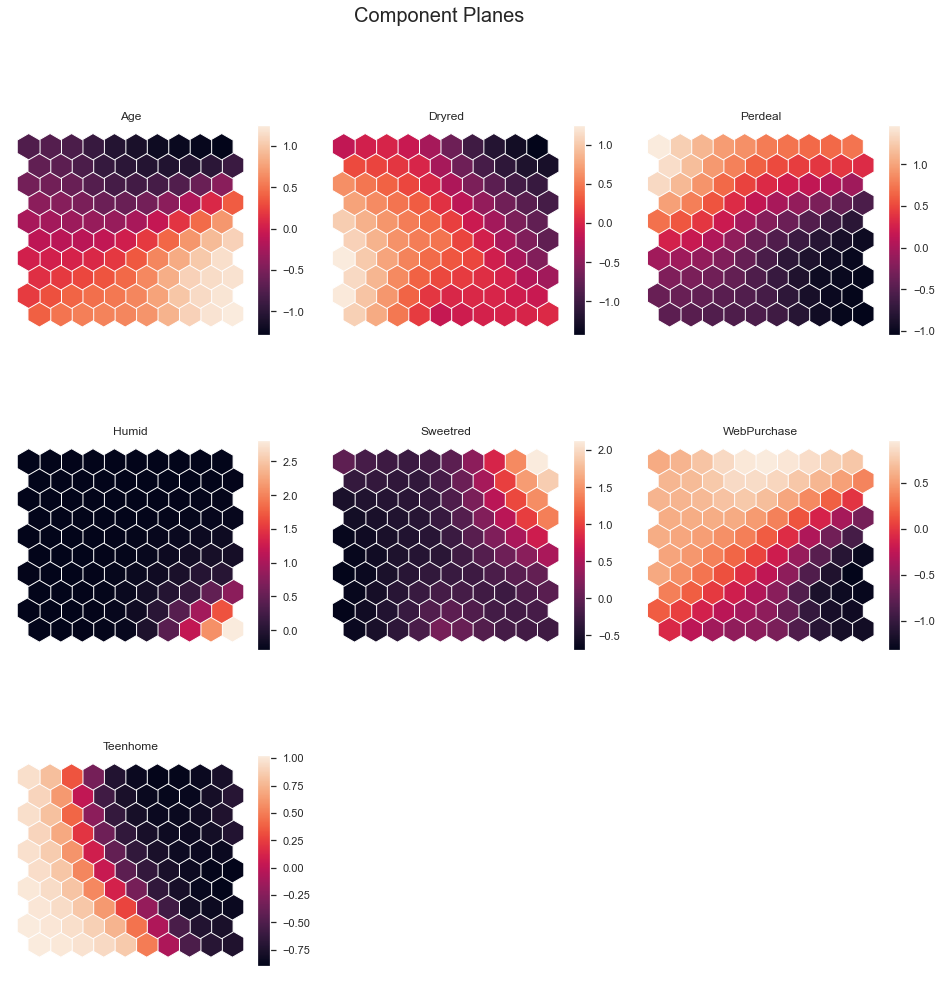

In [70]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

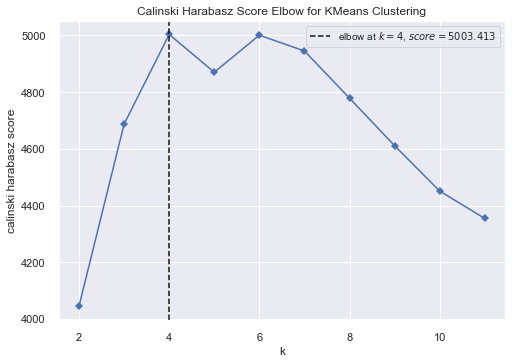

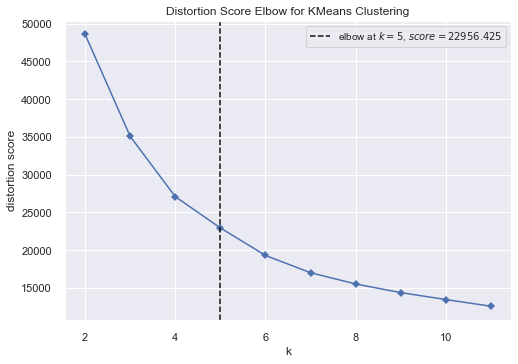

In [71]:
plotKElbow(cluster,selected_df,'calinski_harabasz')
plotKElbow(cluster,selected_df,'distortion')

In [72]:

selected_df.reset_index(inplace=True)
selected_df.drop("Custid",axis=1,inplace=True)

In [73]:
selected_df

Age    Dryred   Perdeal     Humid  Sweetred  WebPurchase  Teenhome
0     1.148127 -0.607860 -1.042401 -0.300150 -0.245223    -1.247888 -0.952460
1     1.733266  0.172100 -1.114482 -0.300150 -0.785592    -1.788266 -0.952460
2    -1.426481 -0.824516  1.228149 -0.300150  1.646071     0.913626 -0.952460
3     0.621503  0.388755 -0.718037 -0.300150  0.430239    -0.383282  1.049913
4     0.621503  0.345424 -0.970320 -0.300150 -0.245223    -0.437320  1.049913
...        ...       ...       ...       ...       ...          ...       ...
9796 -1.192426 -0.434536 -0.898239 -0.300150  0.565332    -0.599434 -0.952460
9797  1.616238  0.432086 -1.042401  3.331666 -0.650500     0.157096  1.049913
9798  1.206641 -0.217880 -1.078442 -0.300150 -0.920685    -1.301925 -0.952460
9799  0.972586 -0.131218 -1.006361 -0.300150  1.240794    -0.329244 -0.952460
9800 -1.660537 -1.994456  1.300230 -0.300150  0.835516     0.535361 -0.952460

[9801 rows x 7 columns]

In [74]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)
hits  = HitMapView(12, 12,"Clustering", text_size=10)
#hits.show(sm, anotate=True, onlyzeros=Falsace, labelsize=7, cmap="Pastel1")

plt.show()

In [75]:
nodes = sm.get_node_vectors()

kmeans_nodes = pd.DataFrame(nodes, columns=selected_df.columns)
kmeans_nodes['kmeans_som_label']= nodeclus_labels

In [76]:
# Obtaining SOM's BMUs labels
bmus_map_kmeans = sm.find_bmu(selected_df)[0]  # get bmus for each observation in df

kmeans_bmus = pd.DataFrame(
    np.concatenate((selected_df, np.expand_dims(bmus_map_kmeans,1)), axis=1),
    index=selected_df.index, columns=np.append(selected_df.columns,"BMU")
)

In [77]:
# Get cluster labels for each observation
som_kmeans_final = kmeans_bmus.merge(kmeans_nodes['kmeans_som_label'], 'left', left_on="BMU", right_index=True)

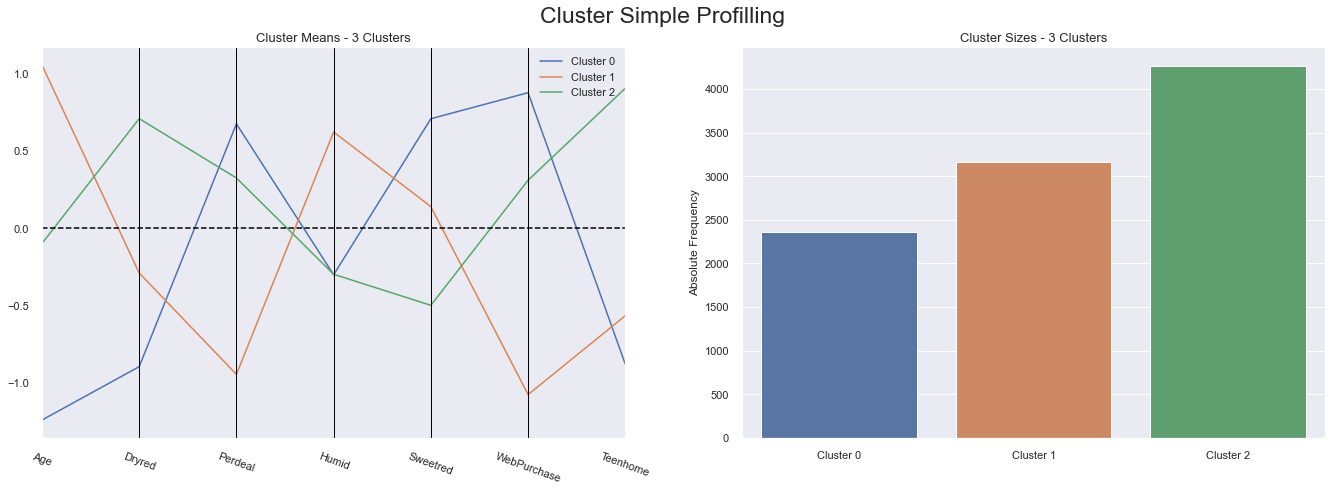

In [78]:
cluster_profiles(som_kmeans_final.drop('BMU',axis=1),["kmeans_som_label"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

<div class="alert alert-block alert-info">

### K-means
    
</div>


In [79]:
kmeans=selected_df.copy()

In [80]:
kmeans['label']=kmeans_cluster(kmeans,3)

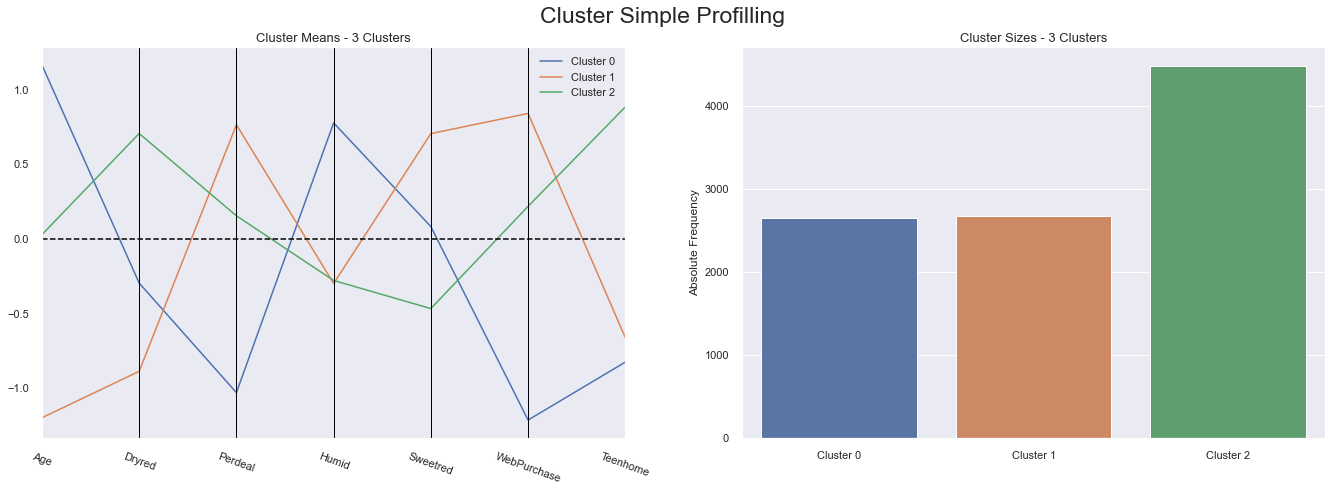

In [81]:
cluster_profiles(kmeans, ["label"], figsize=(23, 7), compar_titles=["K-Means - All Data"])

<div class="alert alert-block alert-info">

### Self-Organizing Maps (SOM) + HC
    
</div>

In [82]:
# Obtaining SOM's BMUs labels
bmus_map_hc = sm.find_bmu(selected_df)[0]  # get bmus for each observation in df

df_bmus_hc = pd.DataFrame(
    np.concatenate((selected_df, np.expand_dims(bmus_map_hc,1)), axis=1),
    index=selected_df.index, columns=np.append(selected_df.columns,"BMU")
)

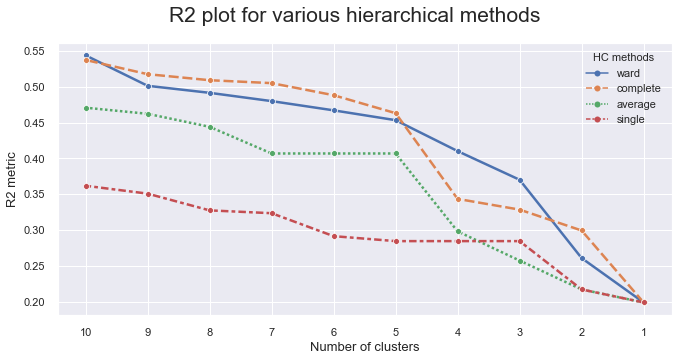

In [83]:
df_bmus_hc = df_bmus_hc.groupby("BMU").mean()
# Prepare input

hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=df_bmus_hc, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [84]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclabel=hclust.fit_predict(df_bmus_hc)

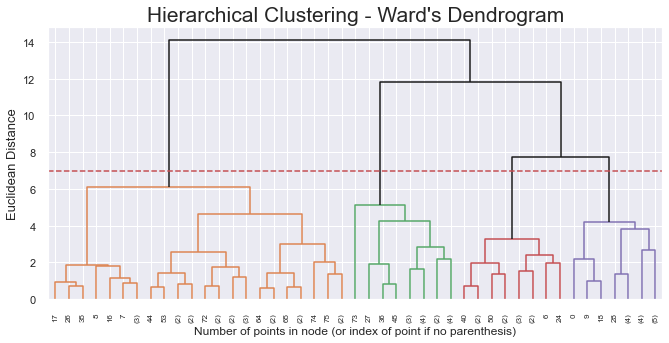

In [85]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 7
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [86]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = sm.cluster(hierclust)


In [87]:
# Check the nodes and and respective clusters
nodes = sm.get_node_vectors()

hc_nodes = pd.DataFrame(nodes, columns=selected_df.columns)
hc_nodes['hc_som_label'] = hc_labels

In [88]:
# Get cluster labels for each observation
som_hc_final = df_bmus_hc.merge(hc_nodes['hc_som_label'], 'left', left_on="BMU", right_index=True)

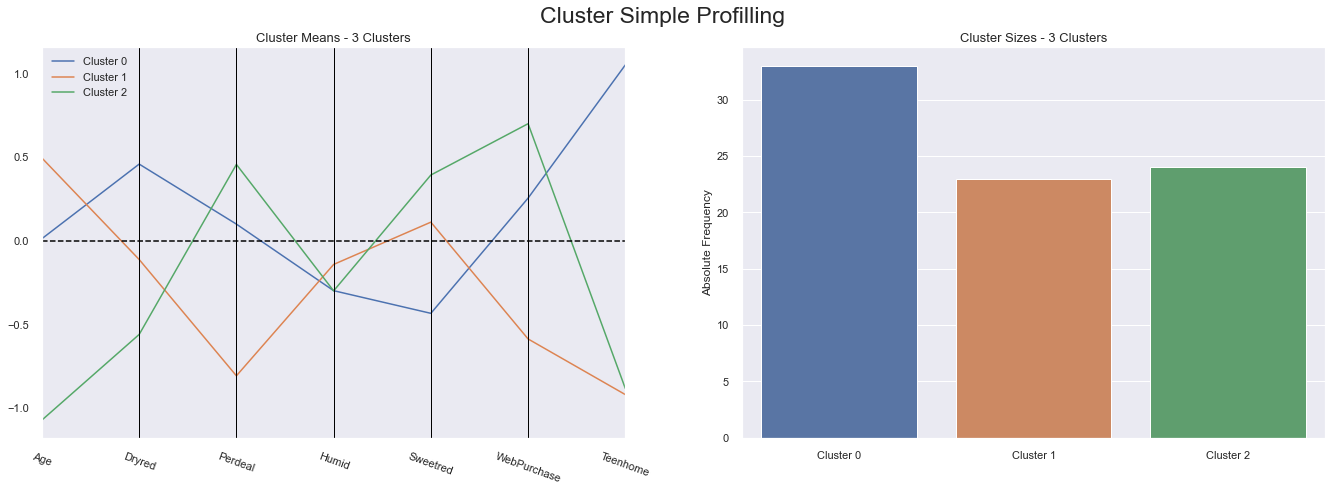

In [89]:
cluster_profiles(som_hc_final,["hc_som_label"], figsize=(23, 7),compar_titles=["SOM + HC - Value"])

<div class="alert alert-block alert-info">

### MiniBatchKMeans
    
</div>

In [90]:
MiniBatch = MiniBatchKMeans(n_clusters=None,random_state=0)

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warn

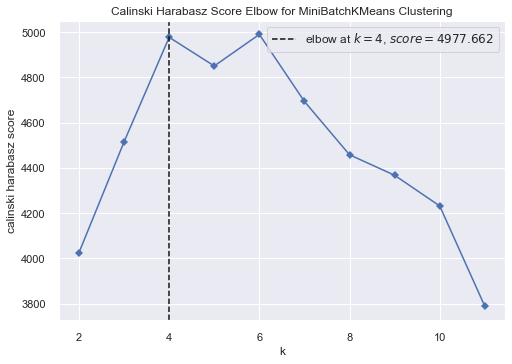

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warn

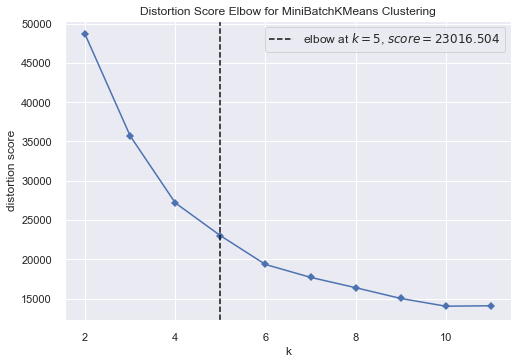

In [91]:
plotKElbow(MiniBatch,selected_df,'calinski_harabasz')
plotKElbow(MiniBatch,selected_df,'distortion')

In [92]:
miniBatch = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
miniBatch_labels = miniBatch.fit_predict(selected_df)

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [93]:
miniBatch_df=selected_df.copy()
miniBatch_df['miniBatch_labels']=miniBatch_labels

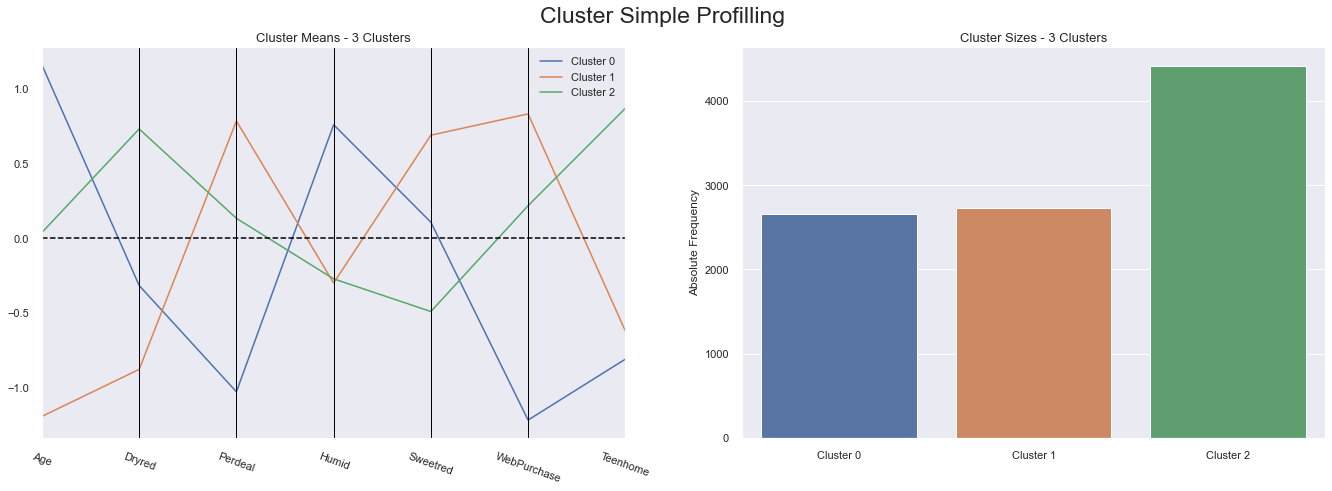

In [94]:
cluster_profiles(miniBatch_df,["miniBatch_labels"], figsize=(23, 7),compar_titles=["MiniBatchKMeans Clustering"])

<div class="alert alert-block alert-info">

### GMM
    
</div>

In [95]:
gmm_df = selected_df.copy()

In [96]:
gmm = GaussianMixture(init_params='kmeans', random_state=0)

For n_clusters = 2, the average silhouette_score is : 0.38758985816228764
For n_clusters = 3, the average silhouette_score is : 0.2998987415330812
For n_clusters = 4, the average silhouette_score is : 0.3571721760075084
For n_clusters = 5, the average silhouette_score is : 0.3119634069928805


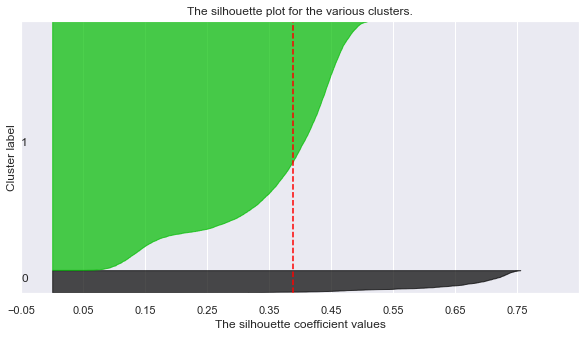

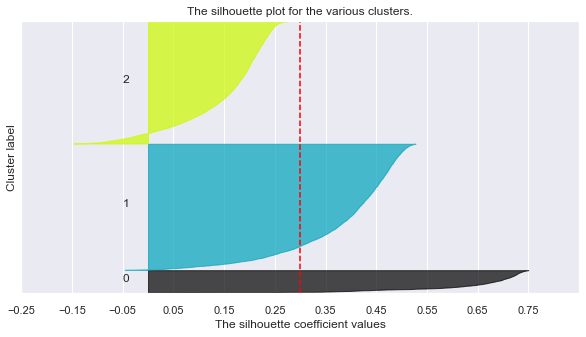

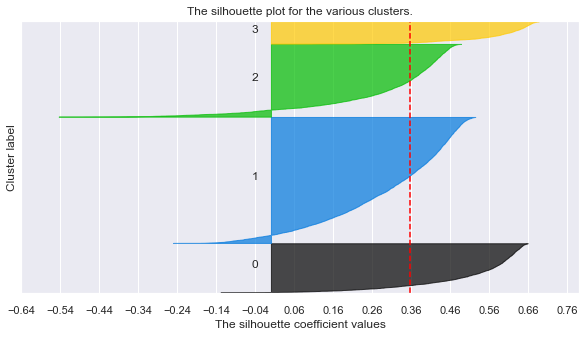

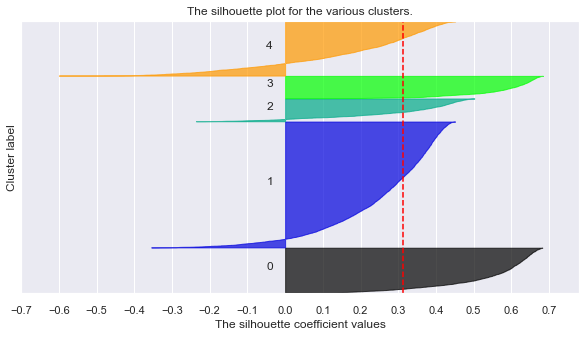

In [97]:
avg_silhouette(2,6,gmm_df,gmm)

In [98]:
gmm_df['label']=gmm_cluster(gmm_df, 3)

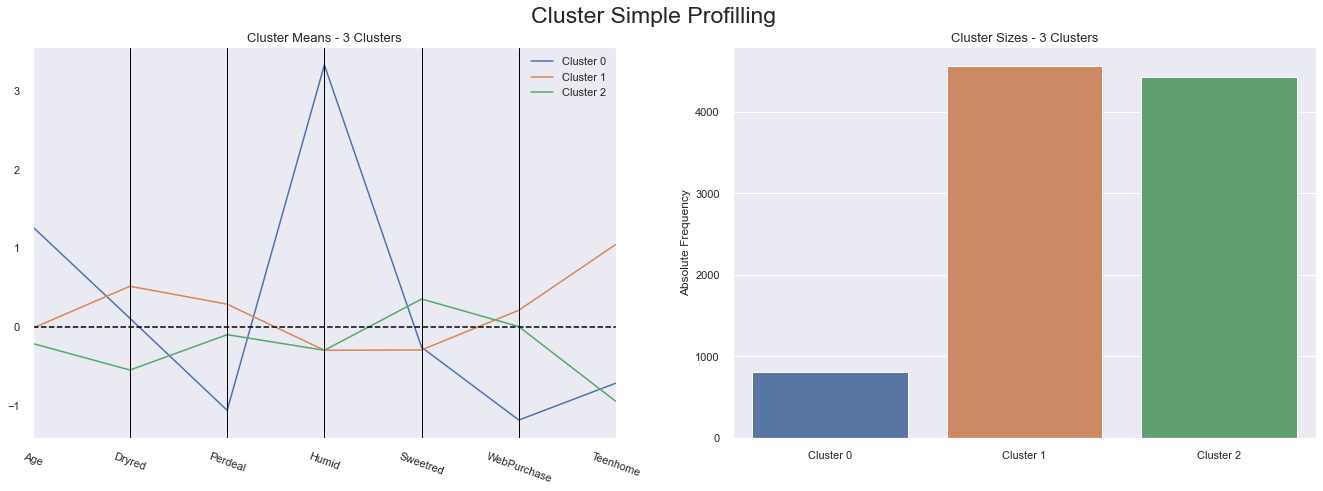

In [99]:
cluster_profiles(gmm_df, ["label"], figsize=(23, 7), compar_titles=[ "GMM - All Data"])

<div class="alert alert-block alert-info">

### HC
    
</div>

In [100]:
hc_df = selected_df.copy()

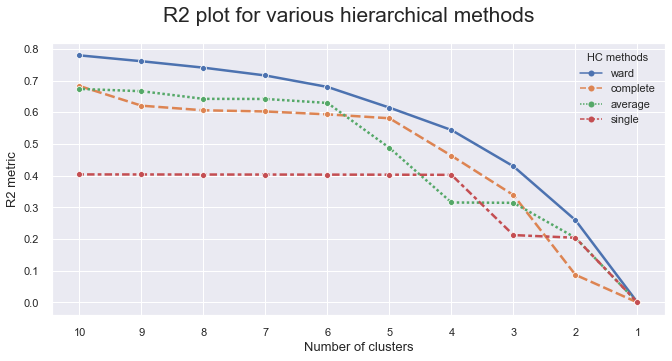

In [101]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(hc_df, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

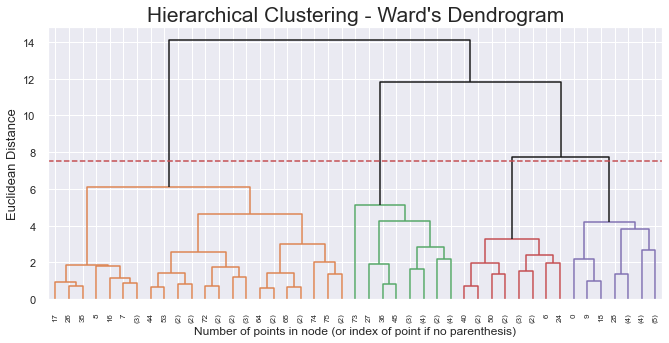

In [102]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 7.5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [103]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=3)
hc_df['label']=hclust.fit_predict(hc_df)

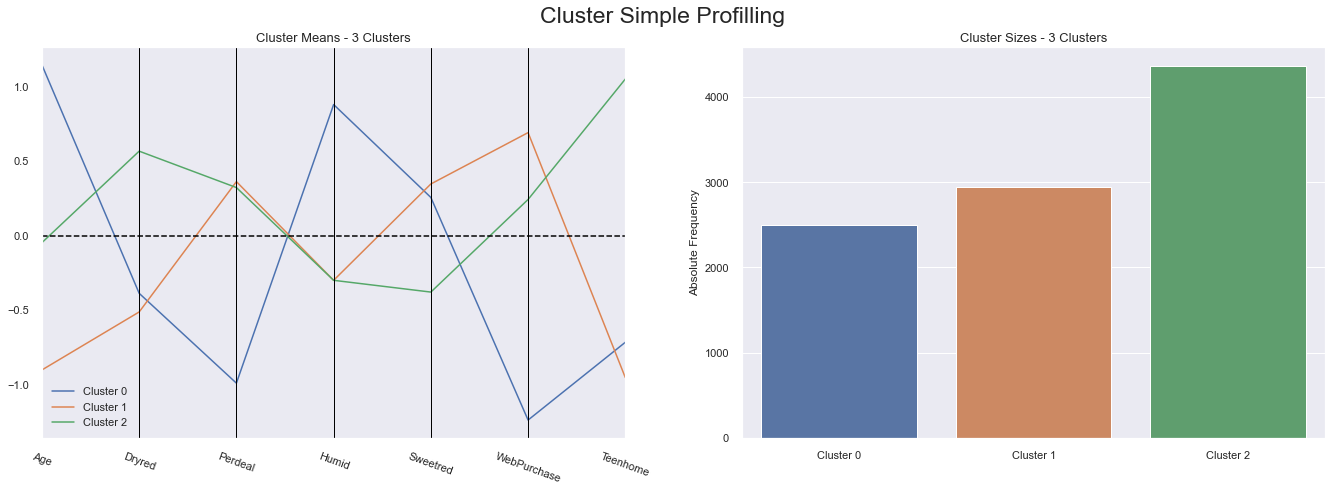

In [104]:
cluster_profiles(hc_df, ["label"], figsize=(23, 7), compar_titles=[ "HC - All Data"])

<div class="alert alert-block alert-success">

## 4) Decision Tree
    
</div>

In [105]:
som_kmeans_final

Age    Dryred   Perdeal     Humid  Sweetred  WebPurchase  Teenhome  \
0     1.148127 -0.607860 -1.042401 -0.300150 -0.245223    -1.247888 -0.952460   
1     1.733266  0.172100 -1.114482 -0.300150 -0.785592    -1.788266 -0.952460   
2    -1.426481 -0.824516  1.228149 -0.300150  1.646071     0.913626 -0.952460   
3     0.621503  0.388755 -0.718037 -0.300150  0.430239    -0.383282  1.049913   
4     0.621503  0.345424 -0.970320 -0.300150 -0.245223    -0.437320  1.049913   
...        ...       ...       ...       ...       ...          ...       ...   
9796 -1.192426 -0.434536 -0.898239 -0.300150  0.565332    -0.599434 -0.952460   
9797  1.616238  0.432086 -1.042401  3.331666 -0.650500     0.157096  1.049913   
9798  1.206641 -0.217880 -1.078442 -0.300150 -0.920685    -1.301925 -0.952460   
9799  0.972586 -0.131218 -1.006361 -0.300150  1.240794    -0.329244 -0.952460   
9800 -1.660537 -1.994456  1.300230 -0.300150  0.835516     0.535361 -0.952460   

       BMU  kmeans_som_label  
0     60.0                 1  
1     72.0                 1  
2      1.0                 0  
3     95.0                 1  
4     97.0                 2  
...    ...               ...  
9796  32.0                 0  
9797  90.0                 1  
9798  72.0                 1  
9799  40.0                 1  
9800   2.0                 0  

[9801 rows x 9 columns]

In [106]:
# Preparing the data
X = som_kmeans_final.drop(columns=['BMU','kmeans_som_label'])
y = som_kmeans_final.kmeans_som_label

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 94.24% of the customers correctly


In [107]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

Age            0.458796
Dryred         0.028740
Perdeal        0.000000
Humid          0.026721
Sweetred       0.052157
WebPurchase    0.000000
Teenhome       0.433585
dtype: float64

In [108]:
#pd.Series(outliers_mcd.index.tolist() + outliers_if.index.tolist()).describe()
#pd.Series(pd.Series(outliers_mcd.index.tolist() + outliers_if.index.tolist()).unique()).describe()

#There aren't duplicate values 

In [109]:
df_out = pd.concat([outliers_mcd,outliers_if])

In [110]:
df_out

Dayswus   Age   Edu  Kidhome  Teenhome  Freq  Recency  Perdeal  \
Custid                                                                    
1010.0    1109.0  20.0  14.0      1.0       0.0   1.0    153.0     55.0   
1286.0     690.0  21.0  15.0      0.0       0.0   3.0     30.0     12.0   
1422.0     669.0  25.0  18.0      0.0       1.0   1.0    538.0     54.0   
1452.0     857.0  20.0  14.0      1.0       0.0   3.0     16.0     72.0   
1647.0     601.0  23.0  17.0      1.0       0.0   1.0    503.0     29.0   
...          ...   ...   ...      ...       ...   ...      ...      ...   
10568.0   1129.0  19.0  13.0      1.0       0.0   1.0    546.0     79.0   
10609.0    577.0  18.0  12.0      1.0       0.0   4.0     61.0     59.0   
10653.0    848.0  20.0  14.0      0.0       0.0   1.0    312.0     28.0   
10680.0   1154.0  18.0  12.0      0.0       0.0   5.0     99.0     45.0   
10925.0    876.0  20.0  14.0      0.0       0.0   5.0     22.0     14.0   

         Dryred  Sweetred  ...  WebVisit  SMRack  LGRack  Humid  Spcork  \
Custid                     ...                                            
1010.0     18.0      55.0  ...       7.0       0       0      0       0   
1286.0      4.0      27.0  ...       5.0       0       0      0       0   
1422.0     26.0      20.0  ...       6.0       0       0      0       0   
1452.0      2.0      19.0  ...       7.0       0       0      0       0   
1647.0     20.0       5.0  ...       7.0       0       0      0       0   
...         ...       ...  ...       ...     ...     ...    ...     ...   
10568.0     6.0       5.0  ...       8.0       0       0      0       0   
10609.0     4.0      37.0  ...       3.0       0       0      0       0   
10653.0     9.0       5.0  ...       3.0       0       0      0       0   
10680.0     4.0      38.0  ...       4.0       0       0      0       0   
10925.0     4.0      58.0  ...       7.0       1       0      0       0   

         Bucket  Access  Complain  Mailfriend  Emailfriend  
Custid                                                      
1010.0        0       0         0           0            0  
1286.0        0       0         0           1            0  
1422.0        0       0         0           0            0  
1452.0        0       0         0           0            0  
1647.0        0       0         0           0            0  
...         ...     ...       ...         ...          ...  
10568.0       0       0         0           0            0  
10609.0       0       0         0           0            0  
10653.0       0       0         1           0            0  
10680.0       0       0         0           0            0  
10925.0       0       1         0           1            1  

[199 rows x 25 columns]

In [111]:
# Predicting the cluster labels of the outliers
out_norm = pd.DataFrame(scaler.transform(df_out[df.columns]),index=df_out.index, columns=df.columns)
out_norm['kmeans_som_label'] = dt.predict(out_norm[X.columns])
out_norm.head()

Dayswus       Age       Edu   Kidhome  Teenhome      Freq   Recency  \
Custid                                                                         
1010.0  1.041603 -1.660537 -1.509993  1.192139 -0.952460 -1.160724  1.697205   
1286.0 -1.031438 -1.602023 -0.967988 -0.838828 -0.952460 -0.993092 -0.504689   
1422.0 -1.135337 -1.367968  0.658026 -0.838828  1.049913 -1.160724  8.589313   
1452.0 -0.205190 -1.660537 -1.509993  1.192139 -0.952460 -0.993092 -0.755311   
1647.0 -1.471773 -1.484995  0.116021  1.192139 -0.952460 -1.160724  7.962758   

         Perdeal    Dryred  Sweetred  ...    SMRack    LGRack    Humid  \
Custid                                ...                                
1010.0  0.831704 -1.431151  6.509397  ... -0.295888 -0.275839 -0.30015   
1286.0 -0.718037 -2.037787  2.726810  ... -0.295888 -0.275839 -0.30015   
1422.0  0.795663 -1.084502  1.781163  ... -0.295888 -0.275839 -0.30015   
1452.0  1.444392 -2.124449  1.646071  ... -0.295888 -0.275839 -0.30015   
1647.0 -0.105349 -1.344489 -0.245223  ... -0.295888 -0.275839 -0.30015   

          Spcork    Bucket    Access  Complain  Mailfriend  Emailfriend  \
Custid                                                                    
1010.0 -0.272397 -0.115034 -0.457528  -0.10654   -0.329522    -0.224432   
1286.0 -0.272397 -0.115034 -0.457528  -0.10654    3.034695    -0.224432   
1422.0 -0.272397 -0.115034 -0.457528  -0.10654   -0.329522    -0.224432   
1452.0 -0.272397 -0.115034 -0.457528  -0.10654   -0.329522    -0.224432   
1647.0 -0.272397 -0.115034 -0.457528  -0.10654   -0.329522    -0.224432   

        kmeans_som_label  
Custid                    
1010.0                 0  
1286.0                 0  
1422.0                 2  
1452.0                 0  
1647.0                 0  

[5 rows x 26 columns]

In [112]:
# Predicting the cluster labels of the outliers
df_out['kmeans_som_label'] = dt.predict(out_norm[X.columns])
df_out

Dayswus   Age   Edu  Kidhome  Teenhome  Freq  Recency  Perdeal  \
Custid                                                                    
1010.0    1109.0  20.0  14.0      1.0       0.0   1.0    153.0     55.0   
1286.0     690.0  21.0  15.0      0.0       0.0   3.0     30.0     12.0   
1422.0     669.0  25.0  18.0      0.0       1.0   1.0    538.0     54.0   
1452.0     857.0  20.0  14.0      1.0       0.0   3.0     16.0     72.0   
1647.0     601.0  23.0  17.0      1.0       0.0   1.0    503.0     29.0   
...          ...   ...   ...      ...       ...   ...      ...      ...   
10568.0   1129.0  19.0  13.0      1.0       0.0   1.0    546.0     79.0   
10609.0    577.0  18.0  12.0      1.0       0.0   4.0     61.0     59.0   
10653.0    848.0  20.0  14.0      0.0       0.0   1.0    312.0     28.0   
10680.0   1154.0  18.0  12.0      0.0       0.0   5.0     99.0     45.0   
10925.0    876.0  20.0  14.0      0.0       0.0   5.0     22.0     14.0   

         Dryred  Sweetred  ...  SMRack  LGRack  Humid  Spcork  Bucket  Access  \
Custid                     ...                                                  
1010.0     18.0      55.0  ...       0       0      0       0       0       0   
1286.0      4.0      27.0  ...       0       0      0       0       0       0   
1422.0     26.0      20.0  ...       0       0      0       0       0       0   
1452.0      2.0      19.0  ...       0       0      0       0       0       0   
1647.0     20.0       5.0  ...       0       0      0       0       0       0   
...         ...       ...  ...     ...     ...    ...     ...     ...     ...   
10568.0     6.0       5.0  ...       0       0      0       0       0       0   
10609.0     4.0      37.0  ...       0       0      0       0       0       0   
10653.0     9.0       5.0  ...       0       0      0       0       0       0   
10680.0     4.0      38.0  ...       0       0      0       0       0       0   
10925.0     4.0      58.0  ...       1       0      0       0       0       1   

         Complain  Mailfriend  Emailfriend  kmeans_som_label  
Custid                                                        
1010.0          0           0            0                 0  
1286.0          0           1            0                 0  
1422.0          0           0            0                 2  
1452.0          0           0            0                 0  
1647.0          0           0            0                 0  
...           ...         ...          ...               ...  
10568.0         0           0            0                 0  
10609.0         0           0            0                 0  
10653.0         1           0            0                 0  
10680.0         0           0            0                 0  
10925.0         0           1            1                 0  

[199 rows x 26 columns]

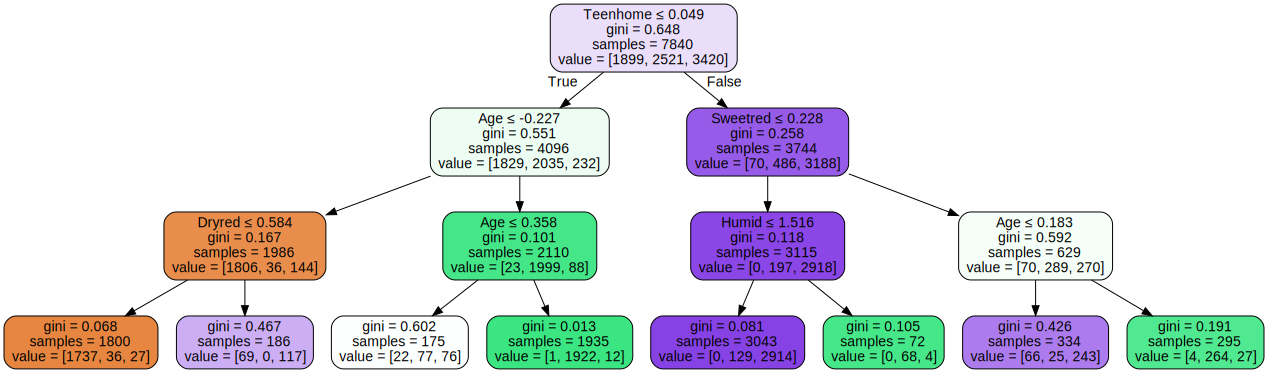

In [113]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)